In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
passenger_data = pd.read_csv(r'C:\Users\taewoo\Desktop\coding challenge\sample.csv')

In [3]:
passenger_data.head(10)

,traveller_unique_ID,Passage_unique_ID,passage_timestamp,air_mode,referral_to_secondary_ind,location_code
0,G,13762,2014-04-01T04:57:38Z,False,0,L2
1,G,13763,2014-04-01T13:24:51Z,False,0,L2
2,F,13764,2014-04-01T14:52:08Z,False,0,L1
3,G,13765,2014-04-01T18:59:01Z,False,0,L5
4,E,13766,2014-04-01T20:16:57Z,True,0,L3
5,J,13767,2014-04-01T20:51:33Z,False,0,L4
6,G,13768,2014-04-01T23:53:02Z,False,0,L3
7,F,13769,2014-04-02T00:11:22Z,False,0,L1
8,J,13770,2014-04-02T03:19:36Z,False,0,L3
9,D,13771,2014-04-02T03:49:42Z,True,0,L3


In [99]:
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24333 entries, 0 to 24332
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   traveller_unique_ID         24333 non-null  object             
 1   Passage_unique_ID           24333 non-null  int64              
 2   passage_timestamp           24333 non-null  datetime64[ns, UTC]
 3   air_mode                    24333 non-null  bool               
 4   referral_to_secondary_ind   24333 non-null  int64              
 5   location_code               24333 non-null  object             
 6   passage_date                24333 non-null  datetime64[ns]     
 7   last_90d_air_passage_count  24333 non-null  float64            
 8   last_90d_referral_count     24333 non-null  float64            
 9   last_90d_location_count     24333 non-null  float64            
 10  year_monthly                24333 non-null  object        

In [4]:
# creating a passage_date column in year-month-date order
passenger_data['passage_date'] = [datetime.datetime.strptime(time,"%Y-%m-%dT%H:%M:%SZ") for time in passenger_data['passage_timestamp']]
# extracting year, month, day from passage_timestamp
passenger_data['passage_date'] = [date.strftime("%Y-%m-%d") for date in passenger_data['passage_date']]
# change the data type of the column to datetime
passenger_data['passage_timestamp'] = pd.to_datetime(passenger_data['passage_timestamp'])
passenger_data['passage_date'] = pd.to_datetime(passenger_data['passage_date'])

                                                
day_to_subtract = 90
passenger_data['last_90d_air_passage_count'] = np.nan
passenger_data['last_90d_referral_count'] = np.nan
passenger_data['last_90d_location_count'] = np.nan


for passenger in passenger_data['traveller_unique_ID'].unique():
    # a temporary dataframe to select data of each unique passenger
    unique_passenger_df = passenger_data[passenger_data['traveller_unique_ID'] == passenger]
    unique_passenger_index = unique_passenger_df.index
    # to store all values of passage_count in past 90 days
    last_90d_air_passage_count = []
    # to store all values of referrals in past 90 days
    last_90d_referral_count = []
    # to store all previous locations in past 90 days
    last_90d_location_count = []
    
    
    for travel_datetime, travel_date in zip(unique_passenger_df['passage_timestamp'],
                                            unique_passenger_df['passage_date']):

        # start date is 90 days before the passage date
        start_date = travel_date - datetime.timedelta(day_to_subtract)
        in_past_90d = unique_passenger_df[(unique_passenger_df['passage_date'] >= start_date) &
                                          (unique_passenger_df['passage_timestamp'] < travel_datetime)
                                          ]
        
        # last_90d_air_passage_count
        if len(in_past_90d['air_mode']) == 0:
            last_90d_air_passage_count.append(0)
        else:
            last_90d_air_passage_count.append(in_past_90d['air_mode'].sum()
                                             )
        
        # last_90d_air_passage_count
        if len(in_past_90d['referral_to_secondary_ind']) == 0:
            last_90d_referral_count.append(0)
        else:
            last_90d_referral_count.append(in_past_90d['referral_to_secondary_ind'].sum()
                                          )

        # last_90d_location_count
        if len(in_past_90d['location_code'].unique()) == 0:
            last_90d_location_count.append(0)
        else:
            last_90d_location_count.append(len(in_past_90d['location_code'].unique()
                                              )
                                          )
        
    # update the last_90d_air_passage_count values in the original datagrame
    for i, air_passage_count in zip(unique_passenger_index, last_90d_air_passage_count):
        passenger_data.at[i, 'last_90d_air_passage_count'] = air_passage_count

    # update the last_90d_referral_count values in the original datagrame
    for i, referral in zip(unique_passenger_index, last_90d_referral_count):
        passenger_data.at[i, 'last_90d_referral_count'] = referral

    # update the last_90d_location_count values in the original datagrame
    for i, locations in zip(unique_passenger_index, last_90d_location_count):
        passenger_data.at[i, 'last_90d_location_count'] = locations     

      traveller_unique_ID  Passage_unique_ID         passage_timestamp  \
24313                   G              13742 2019-03-29 23:37:31+00:00   
24314                   I              13743 2019-03-30 01:16:33+00:00   
24315                   F              13744 2019-03-30 01:25:51+00:00   
24316                   A              13745 2019-03-30 03:14:42+00:00   
24317                   D              13746 2019-03-30 11:16:01+00:00   
24318                   I              13747 2019-03-30 14:22:20+00:00   
24319                   A              13748 2019-03-30 16:18:22+00:00   
24320                   H              13749 2019-03-30 16:41:00+00:00   
24321                   A              13750 2019-03-30 17:41:29+00:00   
24322                   E              13751 2019-03-30 18:54:52+00:00   
24323                   I              13752 2019-03-30 20:37:33+00:00   
24324                   F              13753 2019-03-31 00:31:42+00:00   
24325                   A             

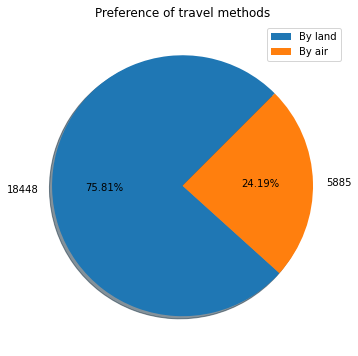

In [54]:
# challenge 2 
# part 1
labels = ['By land', 'By air']
sizes = passenger_data['air_mode'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(sizes, labels=sizes, autopct='%1.2f%%', shadow=True, startangle=45)
plt.title('Preference of travel methods')
plt.legend(labels=labels)
plt.show()

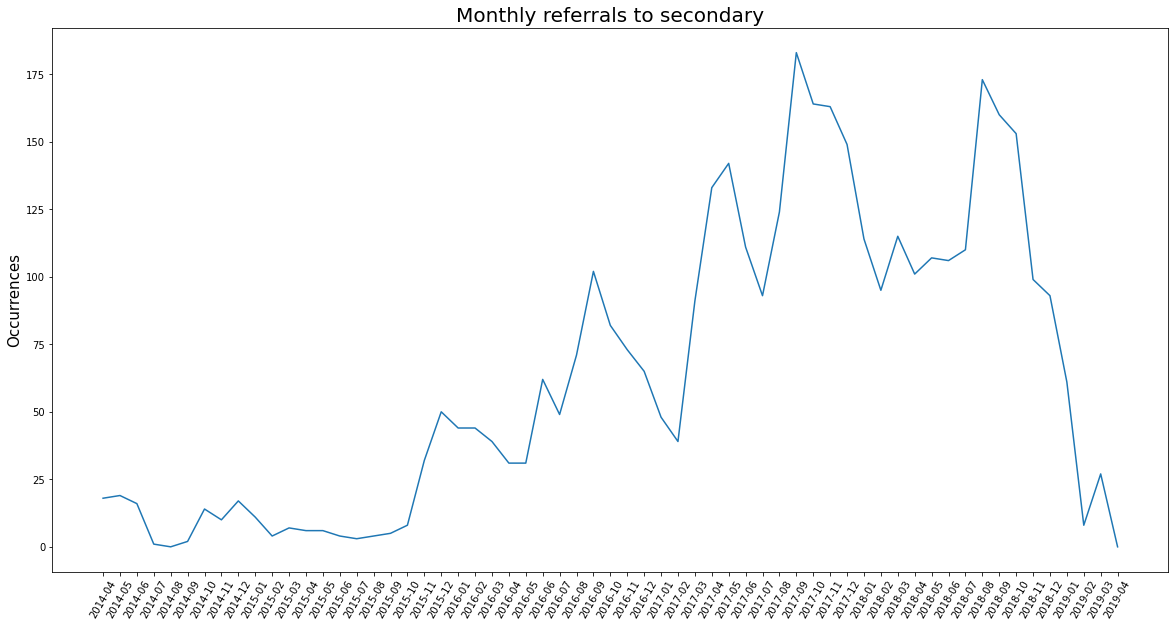

In [93]:
# part 2
# creating a monthly column for easier analysis
passenger_data['year_monthly'] = passenger_data['passage_date'].dt.to_period('M')
passenger_data['year_monthly'] = [date.strftime("%Y-%m") for date in passenger_data['year_monthly']]
# creating a pivot table to sum up monthly referrals to secondary
date_monthly_referral = passenger_data[['referral_to_secondary_ind',
                                        'year_monthly']
                                      ].groupby(by='year_monthly',as_index=False).sum()
monthly_referral = date_monthly_referral['referral_to_secondary_ind']
months = date_monthly_referral['year_monthly']

plt.figure(figsize=(20,10))
plt.plot(months, monthly_referral)
plt.xticks(rotation=60)
plt.title('Monthly referrals to secondary', fontsize=20)
plt.ylabel('Occurrences', fontsize=15)
plt.show()

In [98]:
# part 3
date_monthly_referral = passenger_data[['referral_to_secondary_ind',
                                        'year_monthly',
                                        'location_code']
                                      ].groupby(by=['year_monthly', 'location_code'],as_index=False).sum()

print(date_monthly_referral.head(20))

   year_monthly location_code  referral_to_secondary_ind
0       2014-04            L1                          9
1       2014-04            L2                          2
2       2014-04            L3                          1
3       2014-04            L4                          6
4       2014-04            L5                          0
5       2014-04            L6                          0
6       2014-05            L1                          2
7       2014-05            L2                          2
8       2014-05            L3                          5
9       2014-05            L4                          6
10      2014-05            L5                          3
11      2014-05            L6                          1
12      2014-06            L1                          5
13      2014-06            L2                          5
14      2014-06            L3                          1
15      2014-06            L4                          1
16      2014-06            L5  

For graph 1, people are traveling a lot more by vehicles and trains than airplanes, so the data indicates majority of the 8 distinct locations could be close in distance or a lot pricier when traveled on an aircraft. 

For graph 2, people are sent to the secondary check up a lot more frequently in 2017 & 2018 than any other years, so we can get an idea of the state of national security back then. There might have been more crimes in those years.

Unfortunately, I couldn't do the third graph because of my unfamiliarity with subplots.